In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # mean - 0 & standard deviation - 1
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('C:/Users/user/Desktop/ML Algorithm/bank-additional-full.csv',sep=";")
df = data.copy()
print("Original Dataset:(Top 5)\n\n")
data.head()





Original Dataset:(Top 5)




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
 print("Shape of Dataset:\n")
data.shape

Shape of Dataset:



(41188, 21)

In [3]:
print("Information about the Dataset:\n\n")
data.info()

Information about the Dataset:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17

In [4]:
 data.describe(include='all')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [5]:
print("Null values Appear in Dataset:\n\n")
data.isnull().sum()


Null values Appear in Dataset:




age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Text(0.5, 1.0, 'Education type VS Count')

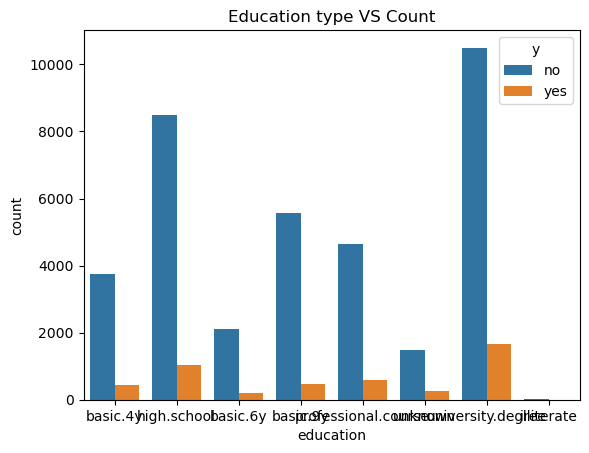

In [6]:
sns.countplot(x='education',data=data,hue='y')
plt.title("Education type VS Count")

Text(0.5, 1.0, 'marital Status VS Count')

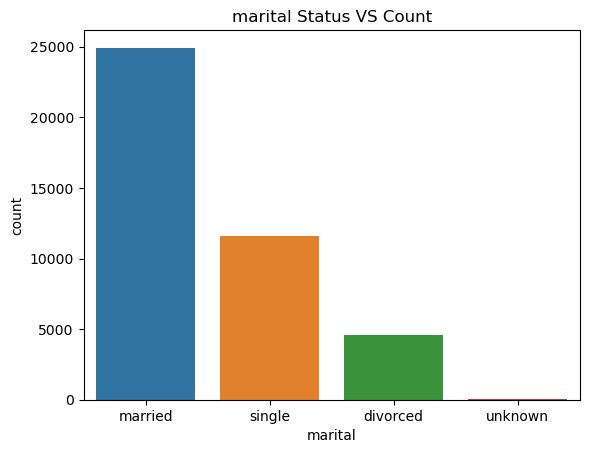

In [7]:
sns.countplot(x="marital",data=data)
plt.title("marital Status VS Count")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

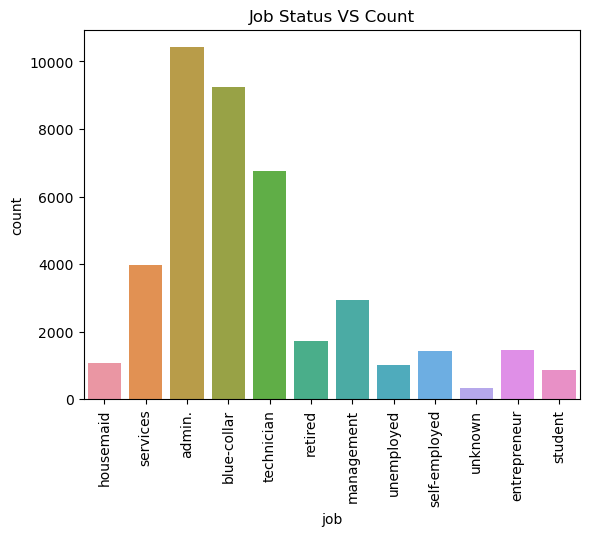

In [8]:
sns.countplot(x="job",data=data)
plt.title("Job Status VS Count")
plt.xticks(rotation=90)


Text(0.5, 1.0, 'Housing Hold Status')

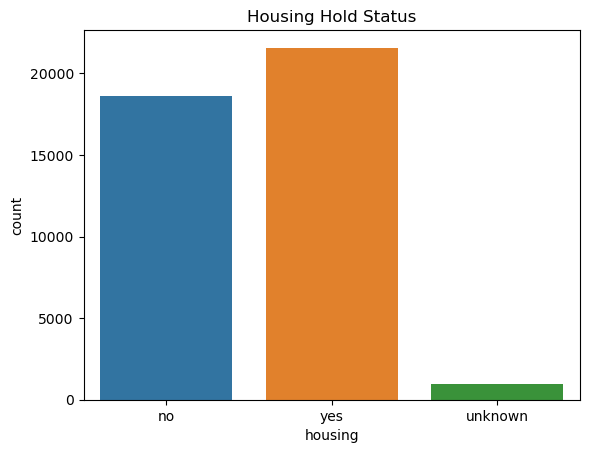

In [9]:
sns.countplot(x='housing',data=data)
plt.title("Housing Hold Status")


Text(0.5, 1.0, 'Loan Status')

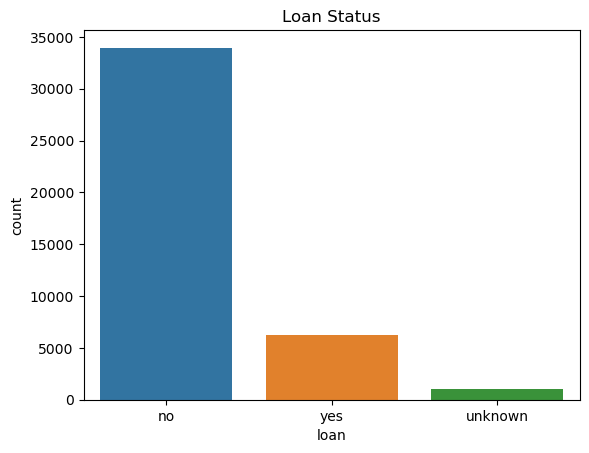

In [10]:
sns.countplot(x="loan",data=data)
plt.title("Loan Status")


Text(0.5, 1.0, 'Contact Methods')

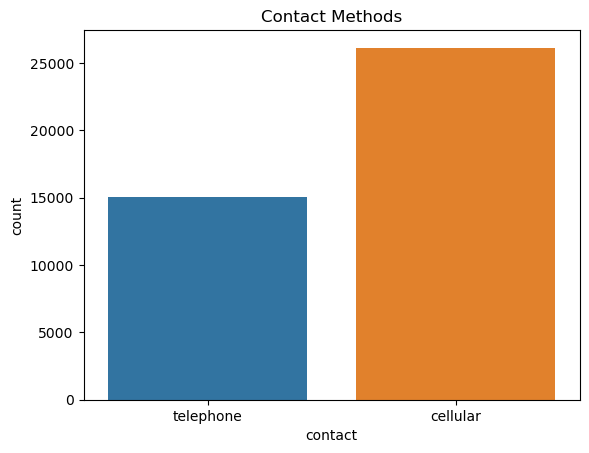

In [11]:
sns.countplot(x="contact",data=data)
plt.title("Contact Methods")


In [12]:
new_Data=pd.get_dummies(data,columns=["age","job","marital","education","default","housing","loan","contact","month","day_of_week","duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"],drop_first= True )
print("Creating new dataset with numerical values:")
new_Data.head()

Creating new dataset with numerical values:


,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,...,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5099.1,nr.employed_5176.3,nr.employed_5191.0,nr.employed_5195.8,nr.employed_5228.1,y_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Logistic Regression: 

In [13]:
 # Logistic Regression:
from sklearn.linear_model import LogisticRegression
X=new_Data.drop('y_yes',axis=1)
Y=new_Data['y_yes']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=12)
Scr=StandardScaler()
Sx_train=Scr.fit_transform(X_train)
Sx_test=Scr.transform(X_test)
model=LogisticRegression()
Fi=model.fit(Sx_train,Y_train)
Y_pred=Fi.predict(Sx_test)
Score=model.score(Sx_train,Y_train)
Acc=accuracy_score(Y_pred,Y_test)
Con=confusion_matrix(Y_pred,Y_test)
Cal=classification_report(Y_pred,Y_test)
print("Training time accuracy score: ",(Score*100),'%')
print('Testing time accuracy score: ',(Acc*100),"%\n\n")
print('Confusion matrix:\n\n',Con,'\n')
print('Classification_Report:\n\n',Cal,'\n')

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time accuracy score:  93.71471927162366 %
Testing time accuracy score:  90.83515416363196 %


Confusion matrix:

 [[7036  475]
 [ 280  447]] 

Classification_Report:

               precision    recall  f1-score   support

           0       0.96      0.94      0.95      7511
           1       0.48      0.61      0.54       727

    accuracy                           0.91      8238
   macro avg       0.72      0.78      0.75      8238
weighted avg       0.92      0.91      0.91      8238
 



#  Naive Bayes :

In [14]:
from sklearn.naive_bayes import GaussianNB
NBmodel=GaussianNB()
NBmodel.fit(Sx_train,Y_train)
NB_Y_pred=NBmodel.predict(Sx_test)
NB_Score=NBmodel.score(Sx_train,Y_train)
NB_Acc=accuracy_score(NB_Y_pred,Y_test)
NB_Con=confusion_matrix(NB_Y_pred,Y_test)
NB_Cal=classification_report(NB_Y_pred,Y_test)
print("Training time accuracy score: ",(NB_Score*100),'%')
print('Testing time accuracy score: ',(NB_Acc*100),"%\n\n")
print('Confusion matrix:\n\n',NB_Con,'\n')
print('Classification_Report:\n\n',NB_Cal,'\n')

Training time accuracy score:  89.41122913505312 %
Testing time accuracy score:  87.72760378732703 %


Confusion matrix:

 [[6629  324]
 [ 687  598]] 

Classification_Report:

               precision    recall  f1-score   support

           0       0.91      0.95      0.93      6953
           1       0.65      0.47      0.54      1285

    accuracy                           0.88      8238
   macro avg       0.78      0.71      0.74      8238
weighted avg       0.87      0.88      0.87      8238
 



 # KNN Alogorithm:

In [15]:
from sklearn.neighbors import KNeighborsClassifier
Kmodel=KNeighborsClassifier(n_neighbors=5)
Kmodel.fit(Sx_train,Y_train)
K_Y_pred=Kmodel.predict(Sx_test)
K_Score=Kmodel.score(Sx_train,Y_train)
K_Acc=accuracy_score(K_Y_pred,Y_test)
K_Con=confusion_matrix(K_Y_pred,Y_test)
K_Cal=classification_report(K_Y_pred,Y_test)
print("Training time accuracy score: ",(K_Score*100),'%')
print('Testing time accuracy score: ',(K_Acc*100),"%\n\n")
print('Confusion matrix:\n\n',K_Con,'\n')
print('Classification_Report:\n\n',K_Cal,'\n')

Training time accuracy score:  90.94688922610015 %
Testing time accuracy score:  88.66229667395 %


Confusion matrix:

 [[7144  762]
 [ 172  160]] 

Classification_Report:

               precision    recall  f1-score   support

           0       0.98      0.90      0.94      7906
           1       0.17      0.48      0.26       332

    accuracy                           0.89      8238
   macro avg       0.58      0.69      0.60      8238
weighted avg       0.94      0.89      0.91      8238
 

